# day42


1. RNN
2. 동요, 노래 생성 모델

In [40]:

from konlpy.corpus import kolaw
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from nltk import *
from keras.utils import to_categorical
import re
from collections import Counter
import numpy as np
import nltk
from konlpy.tag import *
from keras.preprocessing import *
from nltk.tokenize import *
from konlpy.corpus import kolaw
from konlpy.tag import Okt
from keras.preprocessing.text import *

In [35]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import Adam
from sklearn.cluster import KMeans
import seaborn as sns
from keras.utils import np_utils
from keras.preprocessing.sequence import pad_sequences

from nltk import FreqDist

In [2]:
c=kolaw.open('constitution.txt').read()

In [6]:
len(sent_tokenize(c))
sentents=[s for s in sent_tokenize(c)]
sentents[3]

'제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.'

In [ ]:
## 정규화 1 
"""
sentences = [s for s in nltk.sent_tokenize(text)]
sents = []
for s in sentences:
    sents.append(re.sub("^[제]*[0-9]*[조]*\s*[①-⑮]*\s*", "", s.strip()))
sents[5:20]
"""

In [ ]:
## 정규화 2
"""
ko_law = []
for s in sent_tokenize(c):
    temp = re.sub("[제조0-9①-⑮]","",s)
    ko_law.append(temp)
"""

In [9]:
from konlpy.tag import Okt
okt=Okt()
doc0=[" ".join(["".join(w) for w, t in okt.pos(s) 
                if w not in ["제","조"] and
                t not in ['Number','Foreign']]) 
      for s in sent_tokenize(c)]
doc0[3]
#대한민국의 국민이 되는 요건은 법률로 정한다
# for s in sent_tokenize(c):
#     for w, t in okt.pos(s):
#         if t not in ['Number', 'Foreign'] and w not in ['제','조']:
#             print(w)

C:\Users\user\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


'대한민국 의 국민 이 되는 요건 은 법률 로 정 한다 .'

In [10]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(doc0)

In [11]:
doc=[l for l in tokenizer.texts_to_sequences(doc0) 
     if len(l)>1]
len(doc)
len(doc0)
doc[3]
#대한민국 의 국민 이 되는 요건 은 법률 로 정 한다 

[102, 1, 22, 5, 111, 653, 4, 9, 24, 13, 6]

In [16]:
maxlen=max([len(x)-1 for x in doc]) #전체 문장 중에서 가장 많은 단어의 수
vocab_size=len(tokenizer.word_index)+1 #전체 단어 수
#print(maxlen)
    #print(len(x))
print(maxlen, vocab_size)

187 1165


### movie Review 과제

In [13]:
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [14]:
# word2vec 모델 생성
# api 문서 참조
# most_similar("kid"), most_similar("man")...
# 유사도 높은 단어 출력
# most_similar_cosmul("kid"), "man"
# similarity("boy","girl") 
# actor/actress...
# 감성분석


In [41]:

def generate_data(x, maxlen, vocab_size):
    for sentence in x : # x로 부터 문장을 가지고 온다
        # print(sentence)
        # 대한민국 의 / 은 / 헌법
        # 대한민국 의 헌법 / 위치 / 크기 / 국민 
        # 대한민국 의 헌 법 은/을/... 
        # # RNN 기반의 text Generator
# '대한민국 의 국민 이 되는 요건 은 법률 로 정 한다 .'        
        # 입력 데이터 출력데이터 양산
        inputs = []
        targets = []
        for i in range(1, len(sentence)):
            inputs.append(sentence[0:i]) ## 입력 (전문장전체)
            targets.append(sentence[i]) ## 출력 (해당숫자문장)
            # 입력이 되야할 부문이 전체 selecting 되어, appending 된다
            ## 누적된 전 단어 꾸러미 전체가 입력이 됨 
        y = np_utils.to_categorical(targets, vocab_size)
        inputs_sequence=sequence.pad_sequences(inputs, maxlen=maxlen) # 전부다 0으로 채워짐 prepadding
        yield(inputs_sequence, y)
        # 입력 : [000...0 102]
        # 출력 : [000.1000 100]
        
        # print(inputs_sequence)
        # print(y.shape) # 문장 단어수, 모든 단어 개수
        # (단어의수, 단어의종류(ohe) = 단어벡터의수) => (187, 1165)
        # print(y)

for i, (x,y) in enumerate(generate_data(doc, maxlen, vocab_size)):
    print("인덱스번호:", i)
    print("x data:", x.shape, "\n", x)
    print("y data:", y.shape, "\n", y)
    
    ## 길이가 가장긴 문장의 단어 개수 
                          
# yield(inputs_sequence, y) => (x, y) = (input, output) = (대한민국, 의)

인덱스번호: 0
x data: (187, 187) 
 [[  0   0   0 ...   0   0 102]
 [  0   0   0 ...   0 102  28]
 [  0   0   0 ... 102  28 602]
 ...
 [  0   0 102 ... 647 155   2]
 [  0 102  28 ... 155   2  20]
 [102  28 602 ...   2  20 180]]
y data: (187, 1165) 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
인덱스번호: 1
x data: (6, 187) 
 [[  0   0   0 ...   0   0  45]
 [  0   0   0 ...   0  45 439]
 [  0   0   0 ...  45 439 648]
 [  0   0   0 ... 439 648 102]
 [  0   0   0 ... 648 102   4]
 [  0   0   0 ... 102   4 649]]
y data: (6, 1165) 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
인덱스번호: 2
x data: (12, 187) 
 [[  0   0   0 ...   0   0 102]
 [  0   0   0 ...   0 102   1]
 [  0   0   0 ... 102   1 440]
 ...
 [  0   0   0 ...  34 651   4]
 [  0   0   0 ... 651   4  22]
 [  0   0   0 ...   4  22

인덱스번호: 139
x data: (17, 187) 
 [[  0   0   0 ...   0   0   9]
 [  0   0   0 ...   0   9   4]
 [  0   0   0 ...   9   4 235]
 ...
 [  0   0   0 ... 218 264 124]
 [  0   0   0 ... 264 124   3]
 [  0   0   0 ... 124   3 532]]
y data: (17, 1165) 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
인덱스번호: 140
x data: (9, 187) 
 [[  0   0   0 ...   0   0  19]
 [  0   0   0 ...   0  19  10]
 [  0   0   0 ...  19  10  17]
 ...
 [  0   0   0 ... 242   3 243]
 [  0   0   0 ...   3 243   7]
 [  0   0   0 ... 243   7 146]]
y data: (9, 1165) 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
인덱스번호: 141
x data: (24, 187) 
 [[  0   0   0 ...   0   0  56]
 [  0   0   0 ...   0  56  10]
 [  0   0   0 ...  56  10 199]
 ...
 [  0   0   0 ... 244 245  78]
 [  0   0   0 ... 245  78  70]
 [  0   0  

인덱스번호: 252
x data: (12, 187) 
 [[  0   0   0 ...   0   0 134]
 [  0   0   0 ...   0 134   1]
 [  0   0   0 ... 134   1 247]
 ...
 [  0   0   0 ...  77  10   9]
 [  0   0   0 ...  10   9  24]
 [  0   0   0 ...   9  24  13]]
y data: (12, 1165) 
 [[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
인덱스번호: 253
x data: (39, 187) 
 [[   0    0    0 ...    0    0   25]
 [   0    0    0 ...    0   25  254]
 [   0    0    0 ...   25  254   17]
 ...
 [   0    0    0 ... 1033   67    2]
 [   0    0    0 ...   67    2  254]
 [   0    0    0 ...    2  254    3]]
y data: (39, 1165) 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
인덱스번호: 254
x data: (16, 187) 
 [[  0   0   0 ...   0   0 254]
 [  0   0   0 ...   0 254   4]
 [  0   0   0 ... 254   4 416]
 ...
 [  0   0   0 ... 202 121  32]
 [  

 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [42]:
# '대한민국 의 국민 이 되는 요건 은 법률 로 정 한다 .'
## 각각의 분리된 단어가 새로운 입력이 되어 출력된 단어가 또 다시 입력이 된다 
## 누적된 전 단어 꾸러미 전체가 입력이 됨 
## 자연어 생성모델 

In [44]:
X=[]
Y=[]
for x,y in generate_data(doc,maxlen,vocab_size):
    X.append(x)
    Y.append(y)
X=np.concatenate(X)
Y=np.concatenate(Y)
print(X.shape)
print(Y.shape)
    

(6917, 187)
(6917, 1165)


## 이론 

- LSTM(3, input_dim = 1) = (셀의개수(출력), 입력속성수)
- LSTM(3, input_dim = 1, input_length = 4(=시퀀스 데이터 길이)) => input_shape(1,4)
* Dense : [Fully Connect] 형태로 
* LSTM : 출력이 두개, (output,state)

- return.sequences : 시퀀스출력여부 설정 = false // 매시퀀스해당 출력 no
: 맨 마지막 단 하나 출력 many to one 
- 상태 유지 (stateful) 모드 
: 전체 batch (이전 배치) 에서의 h 상태정보를 다음 batch에서 입력으로 삼을껀지
말하는 옵션 => false : weight 초기화 / 상태정보전달 x 



In [46]:
# modeling
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *


W0830 10:28:23.542267  7272 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0830 10:28:23.557207  7272 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0830 10:28:23.560199  7272 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [47]:
# [ 102, 28, ... ] # maxlen : 187 나머지 공간에 padding 0  # 한문장에 등장하는 단어의 최대 길이
# [0,0,0,0.... 102, 28, ... ] 패딩후
# => [102] => [28] => [102,28]
model = Sequential() # 원래, 1165개의 전체 단어집합 
model.add(Embedding(vocab_size, 100, input_length=maxlen))
# ( None, 187, 100 )
# ( 187, 100 ) # 단어 1가 100차원 공간에서 표현되어진다 ( from 1165 차원 )
# 187개의 단어가 100차원에서 표현되어질수있다
model.add(LSTM(100, return_sequences=False)) # 상태유지모드
model.add(Dropout(0.5))
model.add(Dense(vocab_size, activation = 'softmax')) 
# 출력의크기 # = 단어전체종류의 개수 # = vocab_size
model.summary()


W0830 10:36:28.663255  7272 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0830 10:36:28.669241  7272 deprecation.py:506] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 187, 100)          116500    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1165)              117665    
Total params: 314,565
Trainable params: 314,565
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(loss='categorical_crossentropy', 
              optimizer=RMSprop(), metrics=['accuracy'])
hist = model.fit(X, Y, epochs=500, batch_size=800, verbose=2 )
## acc: 0.8288

W0830 10:38:53.437062  7272 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0830 10:38:53.444023  7272 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0830 10:38:53.537791  7272 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/500
 - 15s - loss: 6.7115 - acc: 0.0286
Epoch 2/500
 - 14s - loss: 5.8411 - acc: 0.0438
Epoch 3/500
 - 15s - loss: 5.7570 - acc: 0.0473
Epoch 4/500
 - 15s - loss: 5.7301 - acc: 0.0457
Epoch 5/500
 - 15s - loss: 5.7067 - acc: 0.0492
Epoch 6/500
 - 15s - loss: 5.6864 - acc: 0.0463
Epoch 7/500
 - 15s - loss: 5.6665 - acc: 0.0471
Epoch 8/500
 - 16s - loss: 5.6457 - acc: 0.0486
Epoch 9/500
 - 16s - loss: 5.6151 - acc: 0.0520
Epoch 10/500
 - 16s - loss: 5.5858 - acc: 0.0477
Epoch 11/500
 - 17s - loss: 5.5534 - acc: 0.0494
Epoch 12/500
 - 18s - loss: 5.5089 - acc: 0.0519
Epoch 13/500
 - 18s - loss: 5.4786 - acc: 0.0549
Epoch 14/500
 - 19s - loss: 5.4373 - acc: 0.0539
Epoch 15/500
 - 19s - loss: 5.4002 - acc: 0.0567
Epoch 16/500
 - 20s - loss: 5.3670 - acc: 0.0554
Epoch 17/500
 - 20s - loss: 5.3252 - acc: 0.0548
Epoch 18/500
 - 21s - loss: 5.2890 - acc: 0.0577
Epoch 19/500
 - 21s - loss: 5.2451 - acc: 0.0643
Epoch 20/500
 - 21s - loss: 5.1990 - acc: 0.0708
Epoch 21/500
 - 21s - loss: 5

 - 21s - loss: 2.0775 - acc: 0.5225
Epoch 168/500
 - 21s - loss: 2.0640 - acc: 0.5319
Epoch 169/500
 - 21s - loss: 2.0725 - acc: 0.5310
Epoch 170/500
 - 21s - loss: 2.0581 - acc: 0.5281
Epoch 171/500
 - 21s - loss: 2.0347 - acc: 0.5406
Epoch 172/500
 - 21s - loss: 2.0283 - acc: 0.5446
Epoch 173/500
 - 21s - loss: 2.0247 - acc: 0.5417
Epoch 174/500
 - 21s - loss: 2.0123 - acc: 0.5352
Epoch 175/500
 - 21s - loss: 2.0079 - acc: 0.5414
Epoch 176/500
 - 21s - loss: 1.9967 - acc: 0.5432
Epoch 177/500
 - 21s - loss: 1.9697 - acc: 0.5526
Epoch 178/500
 - 21s - loss: 1.9710 - acc: 0.5547
Epoch 179/500
 - 21s - loss: 1.9607 - acc: 0.5541
Epoch 180/500
 - 21s - loss: 1.9440 - acc: 0.5523
Epoch 181/500
 - 22s - loss: 1.9454 - acc: 0.5505
Epoch 182/500
 - 21s - loss: 1.9241 - acc: 0.5602
Epoch 183/500
 - 21s - loss: 1.9348 - acc: 0.5580
Epoch 184/500
 - 21s - loss: 1.9191 - acc: 0.5586
Epoch 185/500
 - 21s - loss: 1.9039 - acc: 0.5653
Epoch 186/500
 - 22s - loss: 1.8963 - acc: 0.5650
Epoch 187/500


 - 22s - loss: 1.0522 - acc: 0.7492
Epoch 332/500
 - 21s - loss: 1.0513 - acc: 0.7477
Epoch 333/500
 - 22s - loss: 1.0421 - acc: 0.7531
Epoch 334/500
 - 22s - loss: 1.0342 - acc: 0.7480
Epoch 335/500
 - 22s - loss: 1.0567 - acc: 0.7421
Epoch 336/500
 - 22s - loss: 1.0421 - acc: 0.7463
Epoch 337/500
 - 22s - loss: 1.0502 - acc: 0.7438
Epoch 338/500
 - 21s - loss: 1.0376 - acc: 0.7538
Epoch 339/500
 - 21s - loss: 1.0177 - acc: 0.7554
Epoch 340/500
 - 21s - loss: 1.0381 - acc: 0.7454
Epoch 341/500
 - 21s - loss: 1.0367 - acc: 0.7450
Epoch 342/500
 - 21s - loss: 1.0162 - acc: 0.7586
Epoch 343/500
 - 21s - loss: 1.0071 - acc: 0.7513
Epoch 344/500
 - 21s - loss: 1.0058 - acc: 0.7555
Epoch 345/500
 - 23s - loss: 0.9969 - acc: 0.7586
Epoch 346/500
 - 21s - loss: 1.0047 - acc: 0.7609
Epoch 347/500
 - 22s - loss: 0.9986 - acc: 0.7593
Epoch 348/500
 - 21s - loss: 1.0082 - acc: 0.7570
Epoch 349/500
 - 21s - loss: 0.9924 - acc: 0.7617
Epoch 350/500
 - 21s - loss: 0.9977 - acc: 0.7571
Epoch 351/500


 - 22s - loss: 0.6869 - acc: 0.8223
Epoch 496/500
 - 22s - loss: 0.6825 - acc: 0.8269
Epoch 497/500
 - 22s - loss: 0.6592 - acc: 0.8319
Epoch 498/500
 - 22s - loss: 0.6763 - acc: 0.8235
Epoch 499/500
 - 22s - loss: 0.6683 - acc: 0.8314
Epoch 500/500
 - 22s - loss: 0.6703 - acc: 0.8288


In [49]:
## 모델저장
model.save("rnn_text_gen.hdf5")


In [50]:
## 모델불러오기
from keras.models import *
mymodel = load_model("rnn_text_gen.hdf5")

In [56]:
word_list="대한민국 의 국민 이 되는 요건 은 법률 로 정한 다 .".split(" ")
word_list

['대한민국', '의', '국민', '이', '되는', '요건', '은', '법률', '로', '정한', '다', '.']

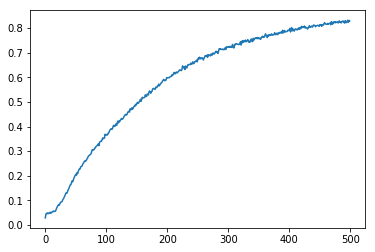

In [57]:
import matplotlib.pyplot as plt
plt.plot(hist.history['acc'])
plt.show()

In [58]:
reverse_word_map=dict(map(reversed,tokenizer.word_index.items())) #1164
len(reverse_word_map)

1164

In [59]:
x=sequence.pad_sequences([[tokenizer.word_index[w] 
                           for w in word_list[:2]]], 
                         maxlen=maxlen)
x

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [60]:
for i in idx[:5]:
    print(reverse_word_map[i])

NameError: name 'idx' is not defined

In [64]:

def predict_word(i, n=1):
    # 함수를 구현하세요
    predict_word(1, n=3)

"""
#n: 가장 확률이 높은 3개 단어 출력
#1: 첫번째 단어
#predict_word(1, n=3)
대한민국 의(62%)
         은(30%)
         헌법(2%)
#predict_word(2, n=3)        
대한민국 의 영토(20%)
            국민(15%)
            주권(12%)
"""

'\n#n: 가장 확률이 높은 3개 단어 출력\n#1: 첫번째 단어\n#predict_word(1, n=3)\n대한민국 의(62%)\n         은(30%)\n         헌법(2%)\n#predict_word(2, n=3)        \n대한민국 의 영토(20%)\n            국민(15%)\n            주권(12%)\n'

In [65]:
predict_word(2, n=3)     

RecursionError: maximum recursion depth exceeded